Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

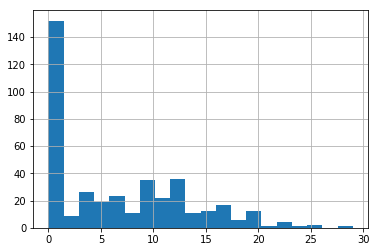

In [18]:
import pandas as pd
carseat_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
carseat_data.head()

carseat_data['Advertising'].hist(bins=20)

Visualize the data with the appropriate plots. 

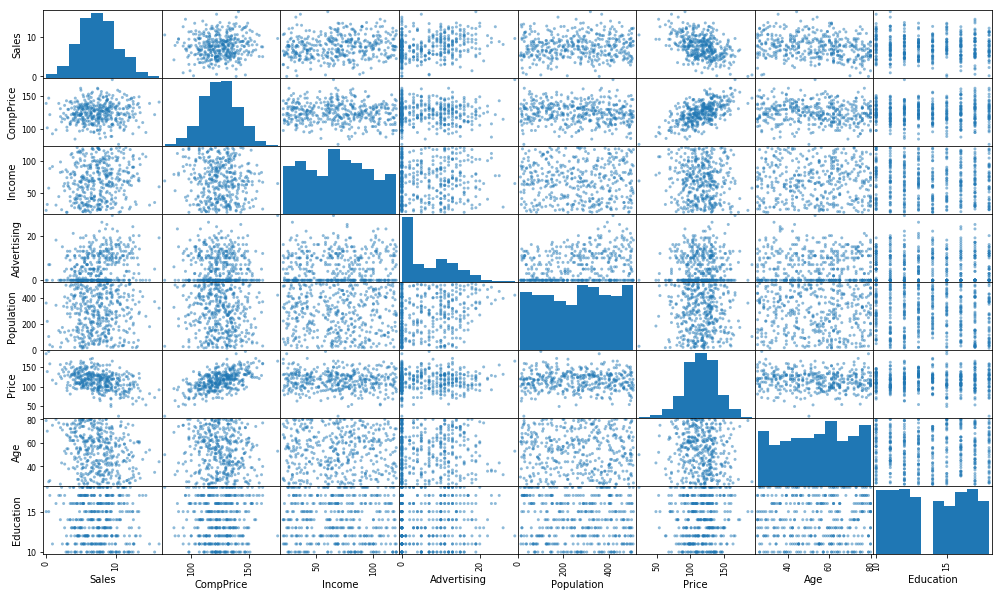

In [10]:
# For example
pd.plotting.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [27]:
carseat_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

What trends do you see in the data?

Clear trends can be observed for the relationship between "Advertising" (if one ignores the null values) and "Sales"; for "Price" and "Sales" and for "CompPrice" and "Sales". For "Age" and "Sales" and weak trend could be possible. There possibly also exists a weak relationship for "Education" and "Sales"

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [37]:
#pd.get_dummies(carseat_data)
#carseat_data.head()

In [34]:
carseat_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [44]:
import statsmodels.api as sm


#X = carseat_data[''] 
Y = carseat_data['Sales']
predictor_list = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

scores = []
for x in predictor_list:
    if x != 'Sales':
        X = carseat_data[x]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X)
        results = model.fit()
        scores.append((x, results.rsquared))
        print('R-squared value for feature {}: {:.4f}'.format(x, results.rsquared))

R-squared value for feature CompPrice: 0.0041
R-squared value for feature Income: 0.0231
R-squared value for feature Advertising: 0.0726
R-squared value for feature Population: 0.0025
R-squared value for feature Price: 0.1980
R-squared value for feature Age: 0.0537
R-squared value for feature Education: 0.0027


Judging by $R^2$ value, the feature "Price" is the single best predictor to predict sales. It explains approximately 20% of the variance in y ("Sales").

Fit a the most possible multiple regression.

In [45]:
X = carseat_data[predictor_list]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.41e-62
Time:                        15:41:52   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7077      1.118      6.896      0.000       5.510       9.905
CompPrice       0.0939      0.008     11.980      0.000       0.079       0.109
Income          0.0129      0.003      3.703      0.000       0.006       0.020
Advertising     0.1309      0.015      8.654      0.000       0.101       0.161
Population     -0.0001      0.001     -0.180      0.857      -0.001       0.001
Price          -0.0925      0.005    -18.314      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.485      0.000      -0.057      -0.033
Education      -0.0400      0.037     -1.077      0.282      -0.113       0.033
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.705
Skew:                           0.288   Prob(JB):                       0.0212
Kurtosis:                       2.639   Cond. No.                     4.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

Repeated the process for the adjusted $R^2$ 

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

<br>
<br> 
<br>

----